<a href="https://colab.research.google.com/github/jonatangraversen01-lab/AI-in-Transport/blob/main/Different_models_for_advanced_ITS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/ProjectAssignmentData/Dataset-PT.csv"
df = pd.read_csv(url, skiprows=1)

df.head(15)

,Calendar_date,route_id,bus_id,stop_sequence,arrival_delay,dwell_time,travel_time_for_previous_section,scheduled_travel_time,upstream_stop_delay,origin_delay,...,factor(weather)Rain,factor(weather)Snow,factor(temperature)Cold,factor(temperature)Extra_cold,factor(temperature)Normal,factor(day_of_week)weekday,factor(day_of_week)weekend,factor(time_of_day)Afternoon_peak,factor(time_of_day)Morning_peak,factor(time_of_day)Off-peak
0,20220108,4,41344,1,151,0,0,120,100,100,...,0,0,0,0,1,0,1,0,0,1
1,20220108,4,41344,2,185,24,171,45,151,100,...,0,0,0,0,1,0,1,0,0,1
2,20220108,4,41344,3,186,0,55,41,185,100,...,0,0,0,0,1,0,1,0,0,1
3,20220108,4,41344,4,202,12,42,94,186,100,...,0,0,0,0,1,0,1,0,0,1
4,20220108,4,41344,5,242,21,98,86,202,100,...,0,0,0,0,1,0,1,0,0,1
5,20220108,4,41344,6,260,13,105,38,242,100,...,0,0,0,0,1,0,1,0,0,1
6,20220108,4,41344,7,278,12,43,79,260,100,...,0,0,0,0,1,0,1,0,0,1
7,20220108,4,41344,8,272,8,85,97,278,100,...,0,0,0,0,1,0,1,0,0,1
8,20220108,4,41344,9,292,24,83,47,272,100,...,0,0,0,0,1,0,1,0,0,1
9,20220108,4,41344,10,351,9,43,85,292,100,...,0,0,0,0,1,0,1,0,0,1


In [ ]:
df = df.drop(["Calendar_date", "route_id", "bus_id"], axis=1)

In [ ]:
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()
corr_matrix['arrival_delay'].sort_values(ascending=False)

,arrival_delay
arrival_delay,1.000000
upstream_stop_delay,0.975019
origin_delay,0.716324
previous_bus_delay,0.265434
factor(day_of_week)weekend,0.190783
factor(time_of_day)Off-peak,0.138109
stop_sequence,0.092616
dwell_time,0.089433
travel_time_for_previous_section,0.081113
factor(weather)Normal,0.022642


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Features (X) and target (y)
X = df.drop(columns=['arrival_delay'])
y = df['arrival_delay']

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Drop raw string categorical columns
cols_to_drop = ['weather', 'temperature', 'day_of_week', 'time_of_day']
X_train = X_train.drop(columns=cols_to_drop)
X_test  = X_test.drop(columns=cols_to_drop)

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

n = len(y_test)

# Number of predictors (features in your model)
p = X.shape[1]   # if X is your features dataframe/array

# Step 2: Calculate Adjusted R²
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f"Adjusted R²: {adj_r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Adjusted R²: 0.9893741248205059
Mean Absolute Error: 12.58742152637922
Mean Squared Error: 397.22027161678153
R-squared: 0.9893767564351623


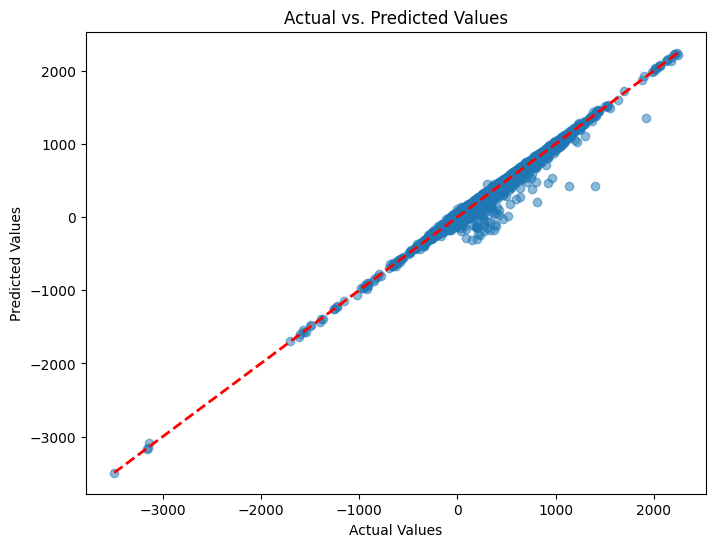

In [ ]:
import matplotlib.pyplot as plt

# y_test contains the actual target values for the test dataset
# y_pred contains the predicted values for the test dataset

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)  # Plot actual vs. predicted values

# Add labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', lw=2)

# Show the plot
plt.show()

In [ ]:
import xgboost as xgb

model = xgb.XGBRegressor()
#https://xgboost.readthedocs.io/en/stable/tutorials/categorical.html

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state=42)
param_dist = {
    'n_estimators': [200, 300, 400],
    'max_depth': [5, 6, 7],
    'learning_rate': [0.1, 0.15, 0.2]
}

random_search = RandomizedSearchCV(xgb, param_distributions=param_dist, n_iter=10,
                                   scoring='r2', cv=3, verbose=1, n_jobs=-1)
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          feature_weights=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraint...
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None, ...),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.15, 0.2],
                                        'max_depth': [5, 6, 7],
                                        'n_estimators': [200, 300, 400]},
                   scoring='r2', verbose=1)

In [ ]:
best_params = random_search.best_params_

print("Best Parameters:", best_params)
print("Best Score:", random_search.best_score_)

Best Parameters: {'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.1}
Best Score: 0.9780378142992655


In [ ]:
import xgboost as xgb

best_xgb = xgb.XGBRegressor(
    max_depth=best_params['max_depth'],
    learning_rate=best_params['learning_rate'],
    n_estimators=best_params['n_estimators'],
    random_state=42
)

best_xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_pred = best_xgb.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

n = len(y_test)

# Number of predictors (features in your model)
p = X.shape[1]   # if X is your features dataframe/array

# Step 2: Calculate Adjusted R²
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f"Adjusted R²: {adj_r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Adjusted R²: 0.9771048348650386
Mean Absolute Error: 13.51672077178955
Mean Squared Error: 855.8755493164062
R-squared: 0.9771105051040649


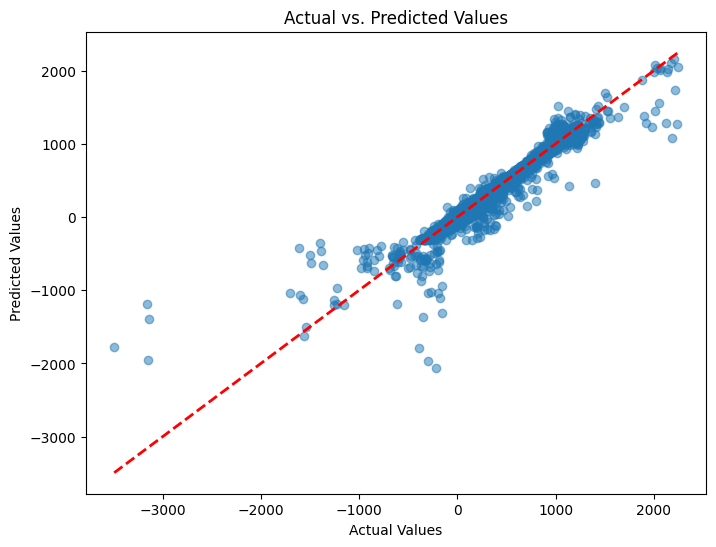

In [ ]:
import matplotlib.pyplot as plt

# y_test contains the actual target values for the test dataset
# y_pred contains the predicted values for the test dataset

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)  # Plot actual vs. predicted values

# Add labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', lw=2)

# Show the plot
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize model with predetermined parameters
tree_reg = DecisionTreeRegressor(
    max_depth=11,
    min_samples_split=16,
    min_samples_leaf=8,
    random_state=42,
    criterion='squared_error',
    max_features=None
)

# Fit model
tree_reg.fit(X_train, y_train)

y_pred = tree_reg.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

n = len(y_test)

# Number of predictors (features in your model)
p = X.shape[1]   # if X is your features dataframe/array

# Step 2: Calculate Adjusted R²
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f"Adjusted R²: {adj_r2}")
print(f"Mean Squared Error: {mse:}")
print(f"Mean Absolute Error: {mae:}")
print(f"R-squared: {r2:}")

Adjusted R²: 0.9823191502483488
Mean Squared Error: 660.9518578121255
Mean Absolute Error: 17.64816400245183
R-squared: 0.9823235291049192


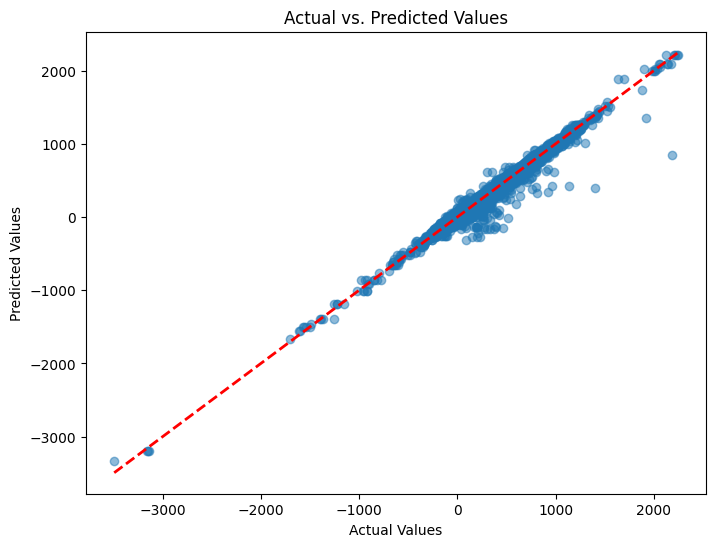

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)  # Plot actual vs. predicted values

# Add labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', lw=2)

# Show the plot
plt.show()